# Progetto CV

In [5]:
import cv2
from matplotlib import pyplot as plt

In [295]:
FILENAMES = ["000001","000002","000003"]
N = len(FILENAMES)

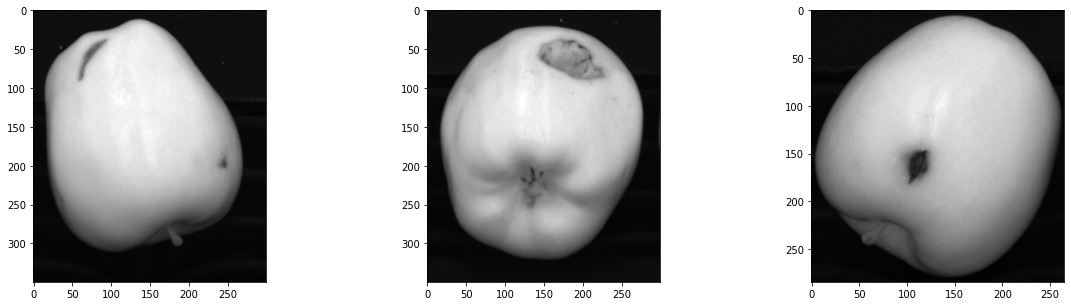

In [328]:
grayscales = []
plt.figure(figsize=(20, 5))
for i, name in enumerate(FILENAMES):
    img = cv2.imread("img/first task/C0_{0}.png".format(name), cv2.IMREAD_GRAYSCALE)
    grayscales.append(img)
    plt.subplot(1,N,i+1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

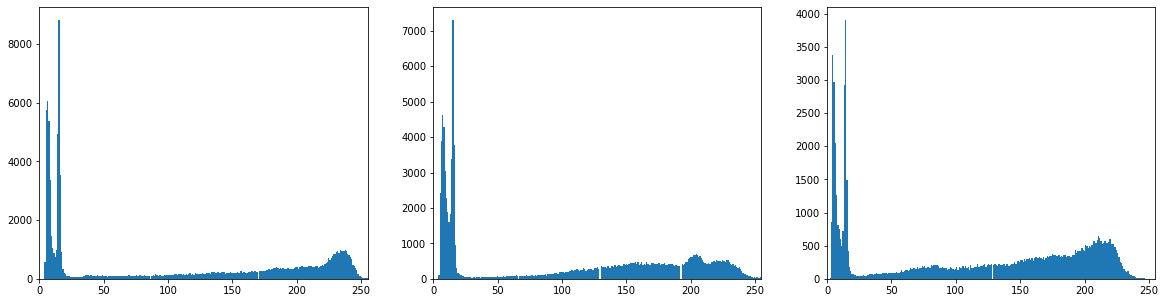

In [329]:
plt.figure(figsize=(20, 5))
for i, img in enumerate(grayscales):
    # calculate mean value from RGB channels and flatten to 1D array
    vals = img.flatten()
    # plot histogram with 255 bins
    plt.subplot(1,N,i+1)
    b, bins, patches = plt.hist(vals, 255)
    plt.xlim([0,255])
plt.show()

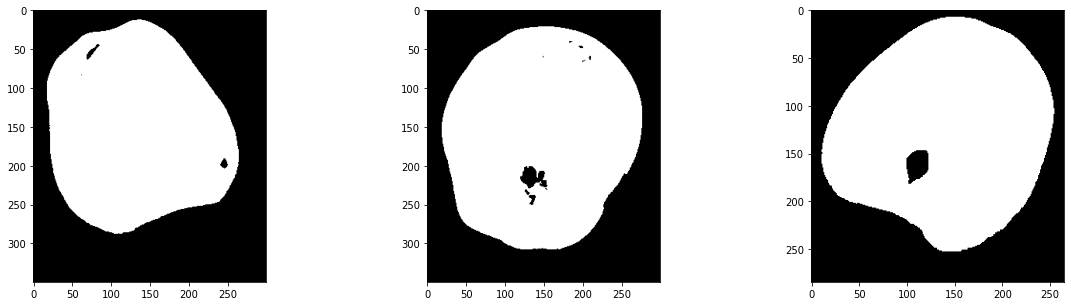

In [330]:
masks = []

plt.figure(figsize=(20,5))
for i, img in enumerate(grayscales):
    blur = cv2.GaussianBlur(img,(3,3),0)
    ret, mask = cv2.threshold(blur, 0, 1, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    masks.append(mask)
    plt.subplot(1,N,i+1)
    plt.imshow(mask, cmap='gray', vmin=0, vmax=1)
plt.show()

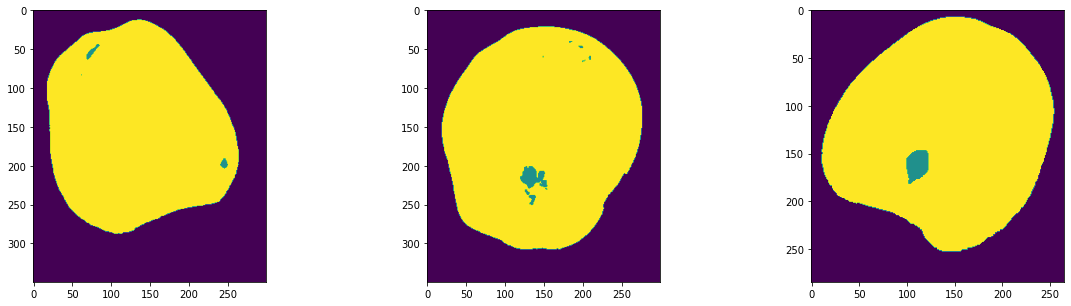

In [331]:
ff_masks = []

plt.figure(figsize=(20,5))
for i, m in enumerate(masks):
    ff_m = m + 1
    cv2.floodFill(ff_m, None, (1,1), 0)
    ff_masks.append(ff_m)
    plt.subplot(1,N,i+1)
    plt.imshow(ff_m, vmin=0, vmax=2)
plt.show()

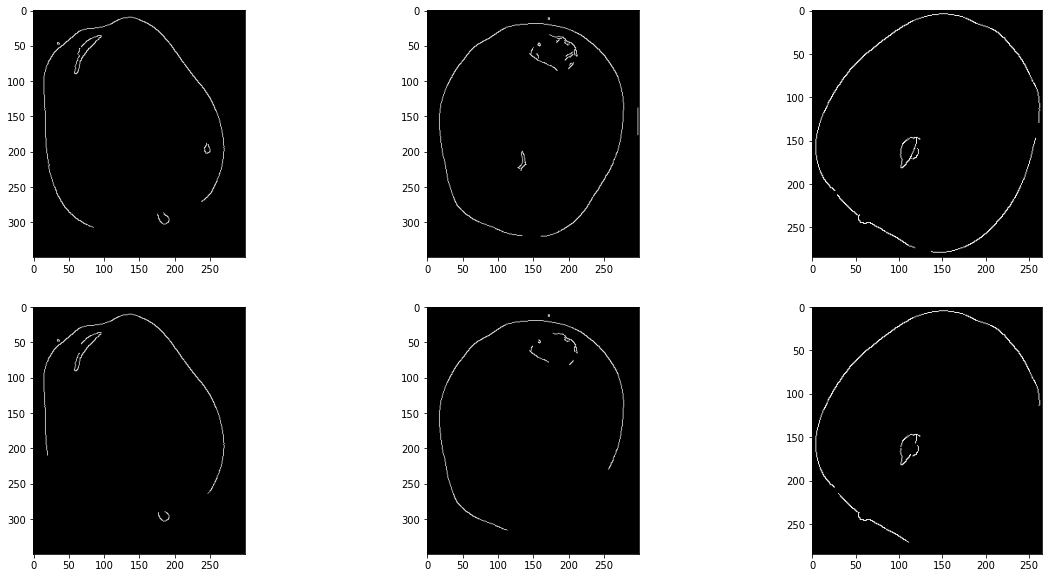

In [327]:
edges_high = []
edges_low = []

plt.figure(figsize=(20,10))
for i, img in enumerate(grayscales):
    edge = cv2.Canny(img, 100, 200)
    edges_low.append(edge)
    plt.subplot(2, N, i+1)
    plt.imshow(edge, cmap='gray', vmin=0, vmax=255)
    edge = cv2.Canny(img, 130, 230)
    edges_high.append(edge)
    plt.subplot(2, N, i+N+1)
    plt.imshow(edge, cmap='gray', vmin=0, vmax=255)
plt.show()

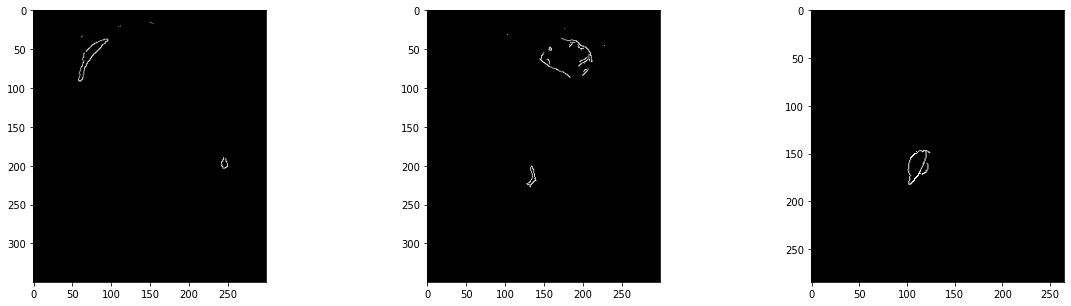

In [341]:
edges = edges_low

plt.figure(figsize=(20,5))
for i, mask in enumerate(ff_masks):
    edge = edges[i] * mask
    edges[i] = edge
    plt.subplot(1,N,i+1)
    plt.imshow(edge, cmap='gray', vmin=0, vmax=255)
plt.show()

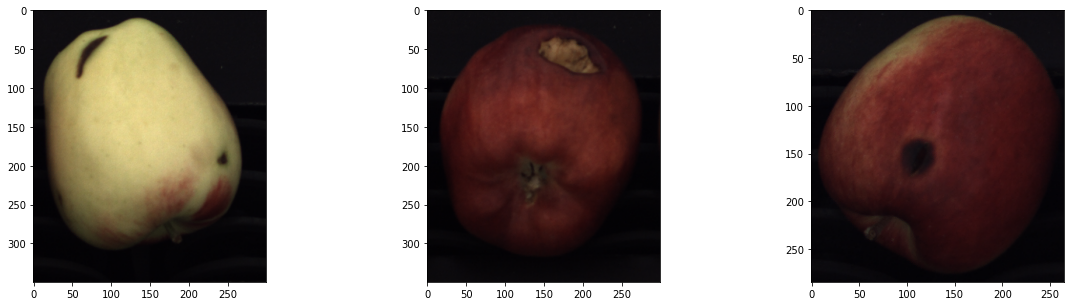

In [347]:
rgb_imgs = []
plt.figure(figsize=(20, 5))
for i, name in enumerate(FILENAMES):
    img_bgr = cv2.imread("img/first task/C1_{0}.png".format(name))
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    rgb_imgs.append(img_rgb)
    plt.subplot(1,N,i+1)
    plt.imshow(img_rgb)
plt.show()

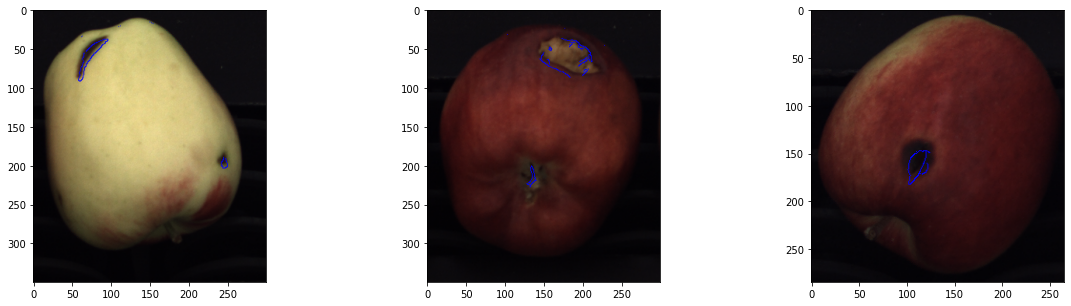

In [348]:
results = []
plt.figure(figsize=(20, 5))
for i, rgb in enumerate(rgb_imgs):
    m, n, _ = rgb.shape
    for j in range(m):
        for k in range(n):
            if edges[i][j,k] != 0:
                rgb[j,k,0] = 0
                rgb[j,k,1] = 0
                rgb[j,k,2] = 255
    results.append(rgb)
    plt.subplot(1,N,i+1)
    plt.imshow(rgb)
plt.show()